In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Boston House 집값 예측

In [2]:
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0, encoding='utf-8')
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### df_data (Data, x)

- 0 : **범죄율**
- 1 : **25,000 평방피트를 초과하는 거주지역 비율**
- 2 : **비소매상업지역 면적 비율** 
- 3 : **찰스강의 경계에 위치한 경우는 1, 아니면 0**
- 4 : **일산화질소 농도**
- 5 : **주택당 방 수 (거실 외 subroom)**
- 6 : **1940년 이전에 건축된 주택의 비율**
- 7 : **직업센터의 거리**
- 8 : **방사형 고속도로까지의 거리**
- 9 : **재산세율**
- 10 : **학생/교사 비율**
- 11 : **인구 중 흑인 비율**
- 12 : **인구 중 하위 계층 비율**

In [3]:
# 집값 테이블 읽기(집값 = target)
df_target = pd.read_excel('boston_house_target.xlsx', index_col=0, encoding='utf-8')
df_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
# 두 테이블 합치기 (집정보 + 집값)
df_main = pd.concat([df_data, df_target], axis=1) # concatenate
df_main.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# 열 이름 정보에 맞게 변환
df_main.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 
df_main.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# 데이터 분석
df_main.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### DataFrame to Numpy array

In [18]:
boston_data = np.array(df_data)
boston_target = np.array(df_target)
print(boston_data.shape)

(506, 13)


In [8]:
print(boston_data.shape)
## 정답값
print(boston_target.shape)

(506, 13)
(506, 1)


In [9]:
# 하위계층 비율만 feature로 선정
boston_X = boston_data[:,12:13]
# 정답 열
boston_Y = boston_target

####  Training, Test set split

In [10]:
## 506개의 데이터를 Training , Test set으로 나눠준다
from sklearn import model_selection
# random_state 규칙적인 랜덤이 생성되는 패턴
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 1)
(152, 1)
(354, 1)
(152, 1)


In [11]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [12]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
## y = ax + b
## a = Coefficient
print(model.coef_)
## b = intercepts
print(model.intercept_)

[[-0.96814078]]
[34.78978059]


#### model test

In [14]:
# model예측 predict(x_train)
print('error',np.mean((model.predict(x_train)-y_train)**2))

error 37.933978172880295


In [15]:
from sklearn.metrics import mean_squared_error
print('MSE', mean_squared_error(model.predict(x_test),y_test))

MSE 39.81715050474416


In [16]:
# 제곱근  Square root
# 에러가 대략적으로 y값의 +-6.3정도 빗나감
np.sqrt(mean_squared_error(model.predict(x_test), y_test))

6.310083240714354

#### 시각화

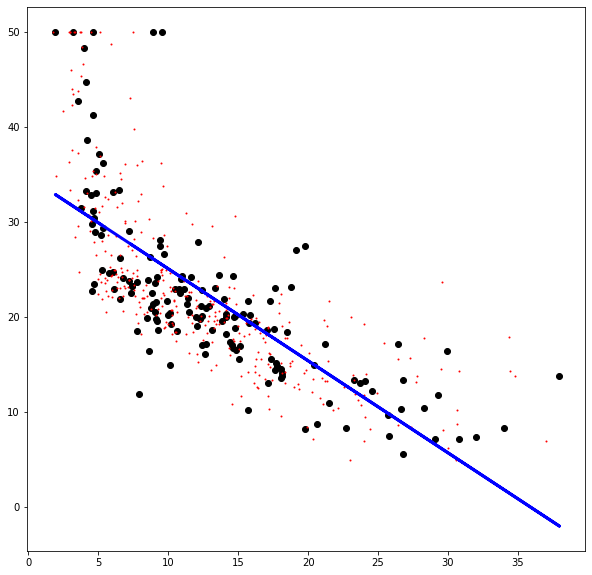

In [17]:
plt.figure(figsize=(10, 10))
plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data
## 모델이 예측한 값을 y로 (model.predict(x_test))
plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line
plt.show()